## B.1 Importar librerías

In [1]:
import numpy as np
from sklearn.datasets import make_moons, fetch_covtype
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, accuracy_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline
import matplotlib.pylab as plt
import itertools

## B.2 Creacion de dataset "Two Moons"

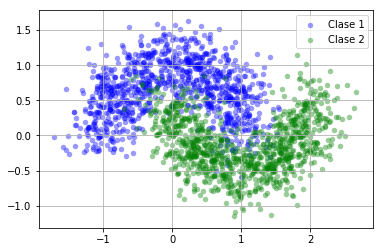

In [2]:
N = 2000
X, Y = make_moons(n_samples=N, noise=0.25)
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(X[Y==0, 0], X[Y==0, 1], c='b', marker='o', linewidth=0, alpha=0.4, s=30, label='Clase 1')
ax.scatter(X[Y==1, 0], X[Y==1, 1], c='g', marker='o', linewidth=0, alpha=0.4, s=30, label='Clase 2')
plt.grid()
plt.legend()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.5, stratify=Y)
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05), np.arange(y_min, y_max, 0.05))

## B.3 Support Vector Machine

- Seleccione kernel='linear' y ajuste C $\in [0.1, 1.0, 10.0, 100.0]$
- Seleccione kernel='rbf' y ajuste C y gamma $\in [0.1, 1.0, 10.0, 100.0]$


Area bajo la curva ROC (validation): 0.943990
Area bajo la curva ROC (train): 0.936688
166 SVs para la clase 1
167 SVs para la clase 2


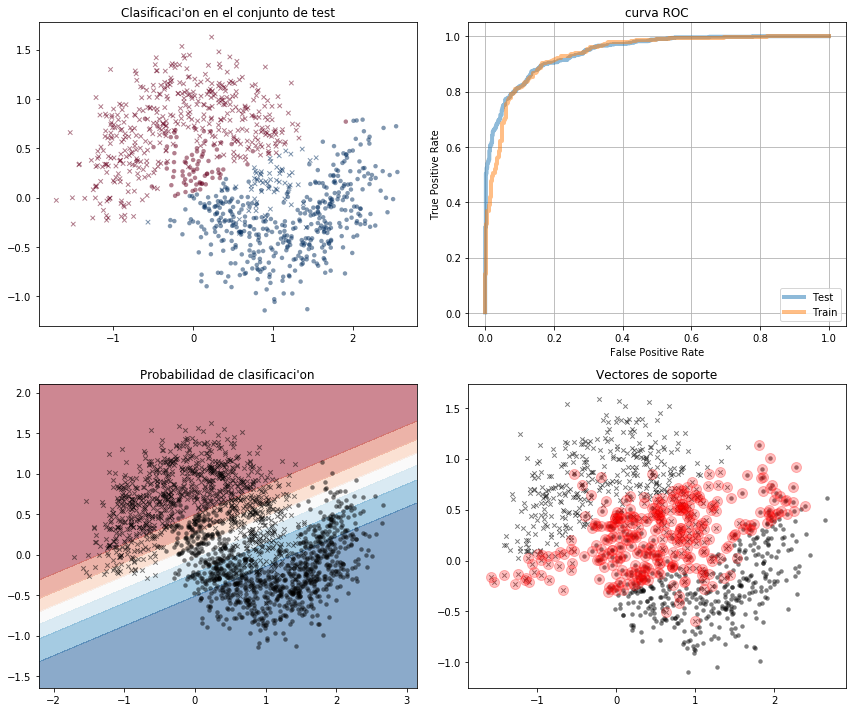

In [3]:
classifier = SVC(C=1.0, kernel='linear', gamma=1.0, probability=True)
classifier.fit(X_train, Y_train)


fig = plt.figure(figsize=(12, 10))

ax = fig.add_subplot(2, 2, 1)
Y_pred = classifier.predict(X_test)
ax.scatter(X_test[Y_test==0, 0], X_test[Y_test==0, 1], c=Y_pred[Y_test==0], 
           marker='x', cmap=plt.cm.RdBu, vmin=0, vmax=1,
           linewidth=1, alpha=0.5, s=20, label='Clase 1')
ax.scatter(X_test[Y_test==1, 0], X_test[Y_test==1, 1], c=Y_pred[Y_test==1], 
           marker='o', cmap=plt.cm.RdBu, vmin=0, vmax=1, 
           linewidth=0, alpha=0.5, s=20, label='Clase 2')
plt.title('Clasificaci\'on en el conjunto de test')

ax = fig.add_subplot(2, 2, 3)
Z = classifier.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
ax.contourf(xx, yy, Z.reshape(xx.shape), cmap=plt.cm.RdBu, alpha=0.5)
ax.scatter(X[Y==0, 0], X[Y==0, 1], c='k', marker='x', linewidth=1, alpha=0.5, s=20, label='Clase 1')
ax.scatter(X[Y==1, 0], X[Y==1, 1], c='k', marker='o', linewidth=0, alpha=0.5, s=20, label='Clase 2')
plt.title('Probabilidad de clasificaci\'on')

ax = fig.add_subplot(2, 2, 2)
Y_pred = classifier.predict_proba(X_test)
fpr, tpr, th = roc_curve(Y_test, Y_pred[:, 1])
ax.plot(fpr, tpr, linewidth=4, alpha=0.5, label='Test')
print("Area bajo la curva ROC (validation): %f" %(auc(fpr, tpr)))
fpr, tpr, th = roc_curve(Y_train, classifier.predict_proba(X_train)[:, 1])
ax.plot(fpr, tpr, linewidth=4, alpha=0.5, label='Train')
print("Area bajo la curva ROC (train): %f" %(auc(fpr, tpr)))
plt.legend(loc=4)
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('curva ROC')
plt.grid()

ax = fig.add_subplot(2, 2, 4)
ax.scatter(X_train[Y_train==0, 0], X_train[Y_train==0, 1], c='k', 
           marker='x', linewidth=1, alpha=0.5, s=20, label='Clase 1')
ax.scatter(X_train[Y_train==1, 0], X_train[Y_train==1, 1], c='k', 
           marker='o', linewidth=0, alpha=0.5, s=20, label='Clase 2')
ax.scatter(X_train[classifier.support_, 0], X_train[classifier.support_, 1], 
           c='r', linewidth=1, alpha=0.25, s=100)
plt.title('Vectores de soporte')

plt.tight_layout()
print("%d SVs para la clase 1" % (classifier.n_support_[0]))
print("%d SVs para la clase 2" % (classifier.n_support_[1]))

## B.4 Random Forests

Area bajo la curva ROC (test): 0.979664
Area bajo la curva ROC (train): 0.999848


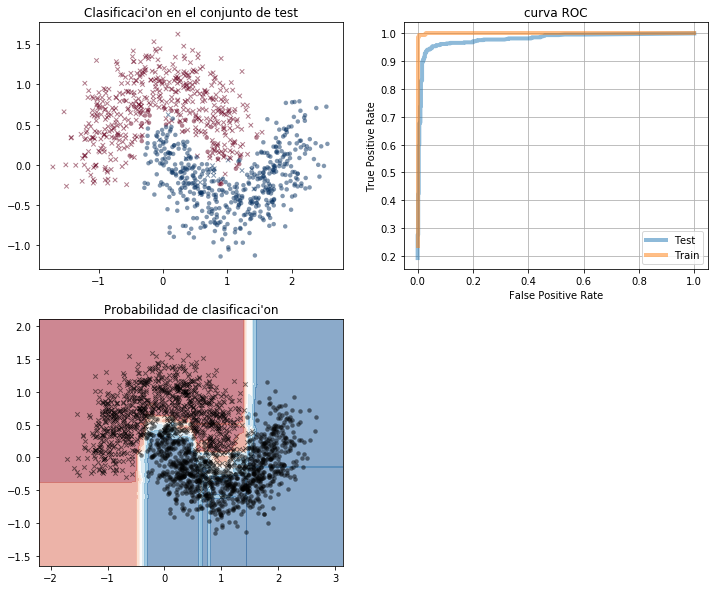

In [4]:
classifier = RandomForestClassifier(
    n_estimators=50,
    criterion='gini',
    max_depth=10,
    max_features='sqrt',
    n_jobs=-1
)
classifier.fit(X_train, Y_train)


fig = plt.figure(figsize=(12, 10))

ax = fig.add_subplot(2, 2, 1)
Y_pred = classifier.predict(X_test)
ax.scatter(X_test[Y_test==0, 0], X_test[Y_test==0, 1], c=Y_pred[Y_test==0], 
           marker='x', cmap=plt.cm.RdBu, vmin=0, vmax=1,
           linewidth=1, alpha=0.5, s=20, label='Clase 1')
ax.scatter(X_test[Y_test==1, 0], X_test[Y_test==1, 1], c=Y_pred[Y_test==1], 
           marker='o', cmap=plt.cm.RdBu, vmin=0, vmax=1, 
           linewidth=0, alpha=0.5, s=20, label='Clase 2')
plt.title('Clasificaci\'on en el conjunto de test')

ax = fig.add_subplot(2, 2, 3)
Z = classifier.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
ax.contourf(xx, yy, Z.reshape(xx.shape), cmap=plt.cm.RdBu, alpha=0.5)
ax.scatter(X[Y==0, 0], X[Y==0, 1], c='k', marker='x', linewidth=1, alpha=0.5, s=20, label='Clase 1')
ax.scatter(X[Y==1, 0], X[Y==1, 1], c='k', marker='o', linewidth=0, alpha=0.5, s=20, label='Clase 2')
plt.title('Probabilidad de clasificaci\'on')

ax = fig.add_subplot(2, 2, 2)
Y_pred = classifier.predict_proba(X_test)
fpr, tpr, th = roc_curve(Y_test, Y_pred[:, 1])
ax.plot(fpr, tpr, linewidth=4, alpha=0.5, label='Test')
print("Area bajo la curva ROC (test): %f" %(auc(fpr, tpr)))
fpr, tpr, th = roc_curve(Y_train, classifier.predict_proba(X_train)[:, 1])
ax.plot(fpr, tpr, linewidth=4, alpha=0.5, label='Train')
print("Area bajo la curva ROC (train): %f" %(auc(fpr, tpr)))
plt.legend(loc=4)
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('curva ROC')
plt.grid()

## B.5 Creacion de dataset "Covertype"

In [5]:
dataset = fetch_covtype()

def dense_to_one_hot(dense):
    a = np.zeros((len(dense), int(np.max(dense))))
    a[np.arange(len(dense)), dense-1] = 1
    return a

X = dataset.data
Y = dataset.target
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, stratify=Y)
print('Ejemplos por clase (entrenamiento)')
Y_train_one_hot = dense_to_one_hot(Y_train)
print(Y_train_one_hot.sum(axis=0))

print('Ejemplos por clase (validacion)')
Y_test_one_hot = dense_to_one_hot(Y_test)
print(Y_test_one_hot.sum(axis=0))

KeyboardInterrupt: 

## B.6 RF para Covertype

Probar con class_weight $\in (\text{"balanced"}, None)$

Dado n_estimators=30, ajustar max_depth $\in [10, 30, 50]$

In [0]:
classifier = RandomForestClassifier(
    n_estimators=30,
    criterion='gini',
    max_depth=10,
    max_features='sqrt',
    n_jobs=-1,
    class_weight='balanced'
)
classifier.fit(X_train, Y_train)

## B.7 performance de RF en Covertype

In [0]:
Y_pred = classifier.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)

def mean_recall(cm):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    return cm.diagonal().mean()

def plot_confusion_matrix(cm, classes,
                          normalized=True,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalized:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        title='Matriz de confusion normalizada'
        fmt = '.2f'
    else:
        title='Matriz de confusion no normalizada'
        fmt = 'd'
        
    plt.figure(figsize=(8, 6), dpi=90)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.grid('off')
    plt.tight_layout()
target_names = [
    'Spruce-Fir',
    'Lodgepole Pine',
    'Ponderosa Pine',
    'Cottonwood/Willow',
    'Aspen',
    'Douglas-fir',
    'Krummholz'
]
plot_confusion_matrix(cm, target_names, normalized=False)
plot_confusion_matrix(cm, target_names, normalized=True)

print('\nPromedio recall por clase (validacion) %.3f' % mean_recall(cm))
Y_train_pred = classifier.predict(X_train)
train_cm = confusion_matrix(Y_train, Y_train_pred)
print('Promedio recall por clase (training) %.3f' % mean_recall(train_cm))
print('Numero de ejemplos en validacion clasificados correctamente: %d' % accuracy_score(Y_test, Y_pred, normalize=False))
print('\nCaracteristicas ordenadas por importancia (RF)')
feature_importances = classifier.feature_importances_
importance_order = np.argsort(-feature_importances)
feature_names = [
    'Elevation',
    'Aspect',
    'Slope',
    'Horizontal distance to hydrology',
    'Vertical distance to hydrology',
    'Horizontal distance to roadways',
    'Hillshade 9am',
    'Hillshade noon',
    'Hillshade 3pm',
    'Horizontal distance to fire points',
    'Rawah Wilderness Area',
    'Neota Wilderness Area',
    'Comanche Peak Wilderness Area',
    'Cache la Poudre Wilderness Area'
] + [('Soil type %d' % (n+1)) for n in range(40)]
for index in importance_order:
    print('\t%.3f %s' % (feature_importances[index], feature_names[index]))